In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt   
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
data=pd.read_csv('/content/bike_buyers.csv')

In [ ]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [ ]:
data.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [ ]:
data.shape

(1000, 13)

In [ ]:
data.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [ ]:
data[data.duplicated()].shape

(0, 13)

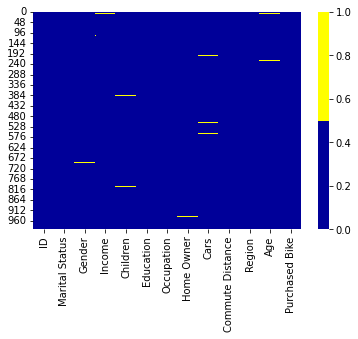

In [ ]:
import seaborn as sns
cols=data.columns
colours=['#000099','#ffff00']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
data.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [ ]:
print(data['Marital Status'].value_counts())
print(data['Purchased Bike'].value_counts())
print(data['Gender'].value_counts())
print(data['Education'].value_counts())
print(data['Occupation'].value_counts())
print(data['Home Owner'].value_counts())
print(data['Commute Distance'].value_counts())
print(data['Region'].value_counts())

Married    535
Single     458
Name: Marital Status, dtype: int64
No     519
Yes    481
Name: Purchased Bike, dtype: int64
Male      500
Female    489
Name: Gender, dtype: int64
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: Education, dtype: int64
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: Occupation, dtype: int64
Yes    682
No     314
Name: Home Owner, dtype: int64
0-1 Miles     366
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
Name: Commute Distance, dtype: int64
North America    508
Europe           300
Pacific          192
Name: Region, dtype: int64


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Marital Status']= label_encoder.fit_transform(data['Marital Status']) 
data['Purchased Bike']= label_encoder.fit_transform(data['Purchased Bike'])
data['Commute Distance']= label_encoder.fit_transform(data['Commute Distance'])
data['Home Owner']= label_encoder.fit_transform(data['Home Owner']) 
data['Occupation']= label_encoder.fit_transform(data['Occupation']) 
data['Education']= label_encoder.fit_transform(data['Education']) 
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data['Region']= label_encoder.fit_transform(data['Region'])   

In [ ]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
3,24381,1,2,70000.0,0.0,0,3,1,1.0,4,2,41.0,1
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   int64  
 2   Gender            1000 non-null   int64  
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   int64  
 6   Occupation        1000 non-null   int64  
 7   Home Owner        1000 non-null   int64  
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   int64  
 10  Region            1000 non-null   int64  
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 101.7 KB


In [ ]:
for i,j in enumerate(data.columns):
  print(j)
  print(data[j].skew())
  for x in range (2):
    print('........')

ID
0.045448543037581814
........
........
Marital Status
0.2679642953609045
........
........
Gender
0.14560573812874603
........
........
Income
0.7511714500455005
........
........
Children
0.39299964680458044
........
........
Education
0.1325950224074148
........
........
Occupation
-0.30383249158933734
........
........
Home Owner
-0.70748901400416
........
........
Cars
0.4178828358469888
........
........
Commute Distance
0.32672954180522507
........
........
Region
0.1470760253013236
........
........
Age
0.5233967855332238
........
........
Purchased Bike
0.07616923298657759
........
........


In [ ]:
data['Age']=data["Age"].fillna(data["Age"].mean())
data['Income']=data["Income"].fillna(data["Income"].mean())
data['Children']=data["Children"].fillna(data["Children"].mean())
data['Cars']=data["Cars"].fillna(data["Cars"].mean())

In [ ]:
data.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   int64  
 2   Gender            1000 non-null   int64  
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   int64  
 6   Occupation        1000 non-null   int64  
 7   Home Owner        1000 non-null   int64  
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   int64  
 10  Region            1000 non-null   int64  
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 101.7 KB


In [ ]:
data.drop('ID',axis=1,inplace=True)

In [ ]:
data.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
3,1,2,70000.0,0.0,0,3,1,1.0,4,2,41.0,1
4,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1


In [ ]:
data.corr()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
Marital Status,1.000000,-0.079990,-0.078903,-0.143554,0.053541,-0.075478,-0.296595,0.013840,0.036908,-0.005692,-0.208470,0.116908
Gender,-0.079990,1.000000,0.057240,0.001746,-0.010470,0.043338,-0.008881,0.063130,0.058161,0.081343,-0.001572,-0.023361
Income,-0.078903,0.057240,1.000000,0.258783,-0.229017,0.142162,0.020600,0.434591,0.154433,0.283860,0.170355,0.046734
Children,-0.143554,0.001746,0.258783,1.000000,-0.044312,0.019077,0.159200,0.276667,0.066685,0.060937,0.525962,-0.121360
Education,0.053541,-0.010470,-0.229017,-0.044312,1.000000,0.029801,-0.121417,0.163506,0.114571,-0.138469,-0.091854,-0.141277
Occupation,-0.075478,0.043338,0.142162,0.019077,0.029801,1.000000,0.006270,0.058060,0.202396,0.222479,-0.163575,0.008847
Home Owner,-0.296595,-0.008881,0.020600,0.159200,-0.121417,0.006270,1.000000,-0.073855,0.152237,0.001593,0.106772,-0.016528
Cars,0.013840,0.063130,0.434591,0.276667,0.163506,0.058060,-0.073855,1.000000,0.257648,0.248045,0.184267,-0.199190
Commute Distance,0.036908,0.058161,0.154433,0.066685,0.114571,0.202396,0.152237,0.257648,1.000000,0.304697,0.147681,-0.075957
Region,-0.005692,0.081343,0.283860,0.060937,-0.138469,0.222479,0.001593,0.248045,0.304697,1.000000,0.057435,0.048943


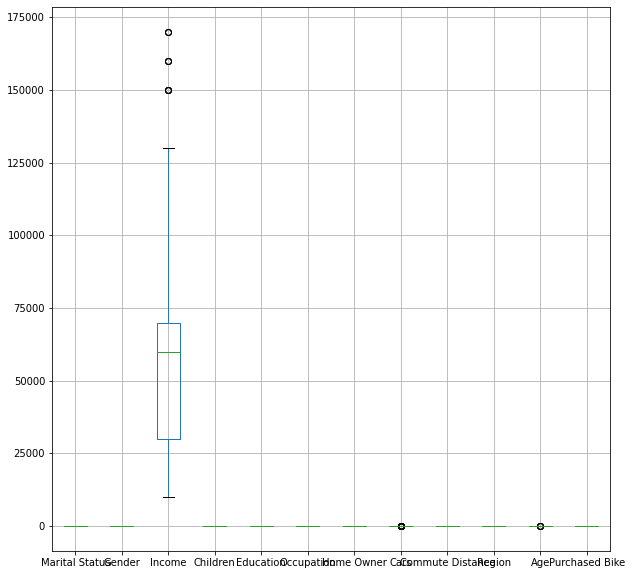

In [ ]:
plt.Figure(figsize=(10,10))
pd.plotting.boxplot(data,figsize=(10,10))

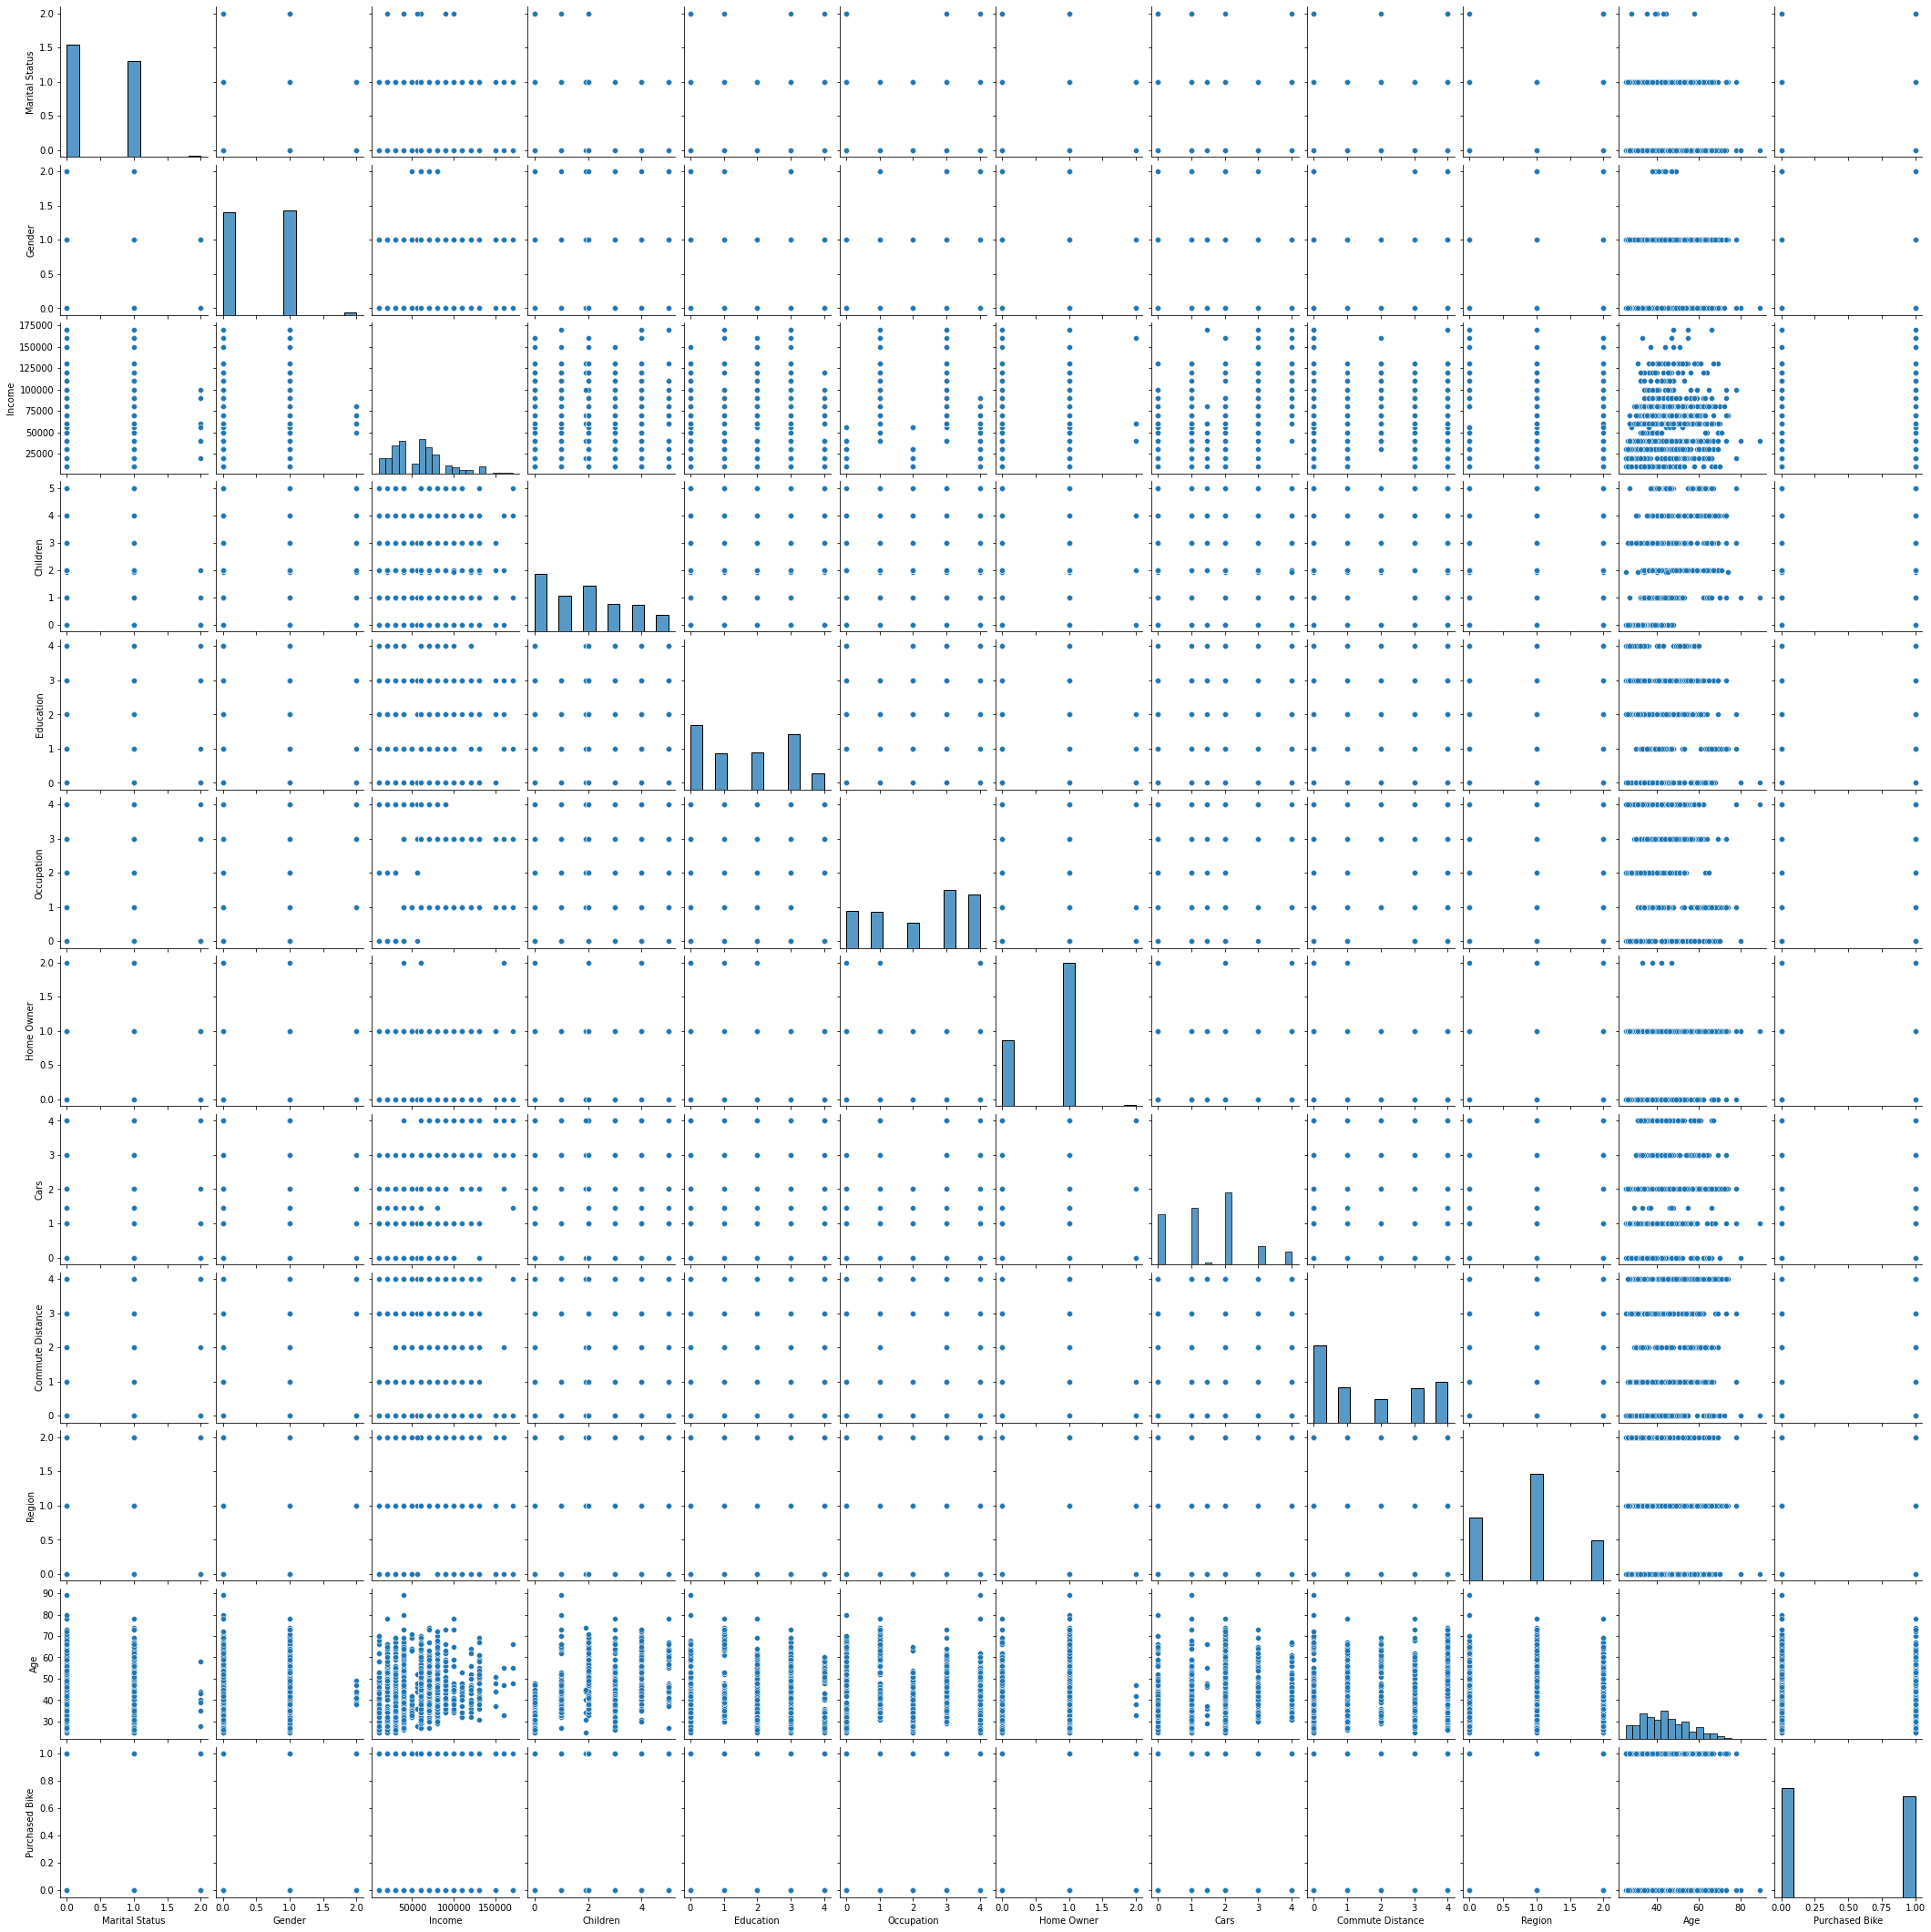

In [ ]:
sns.pairplot(data)

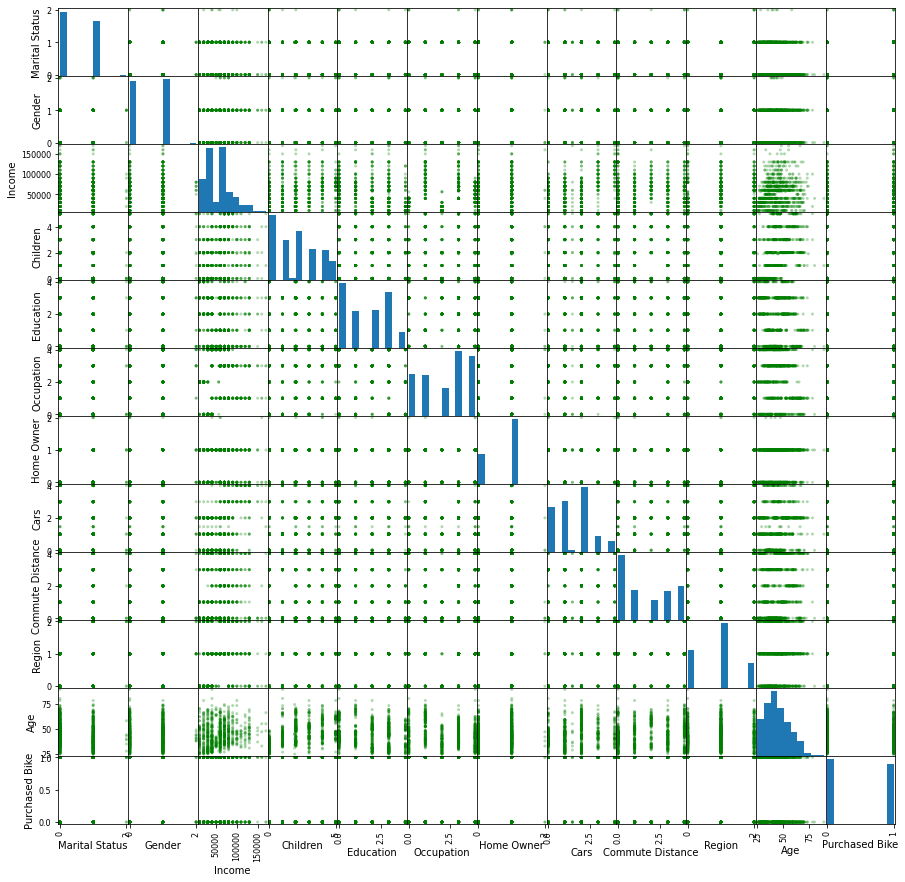

In [ ]:
pd.plotting.scatter_matrix(data,figsize=(15,15),alpha=0.3,color='green')
plt.show()

In [ ]:
X = data.drop(columns='Purchased Bike',axis=1)
Y = data['Purchased Bike']

In [ ]:
X.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0
1,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0
2,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0
3,1,2,70000.0,0.0,0,3,1,1.0,4,2,41.0
4,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0


In [ ]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Purchased Bike, Length: 1000, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Building Decision Tree Classifier using Entropy Criteria

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

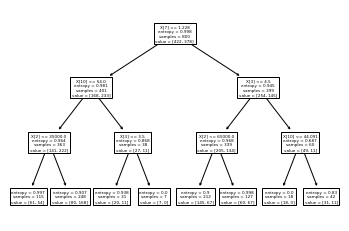

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

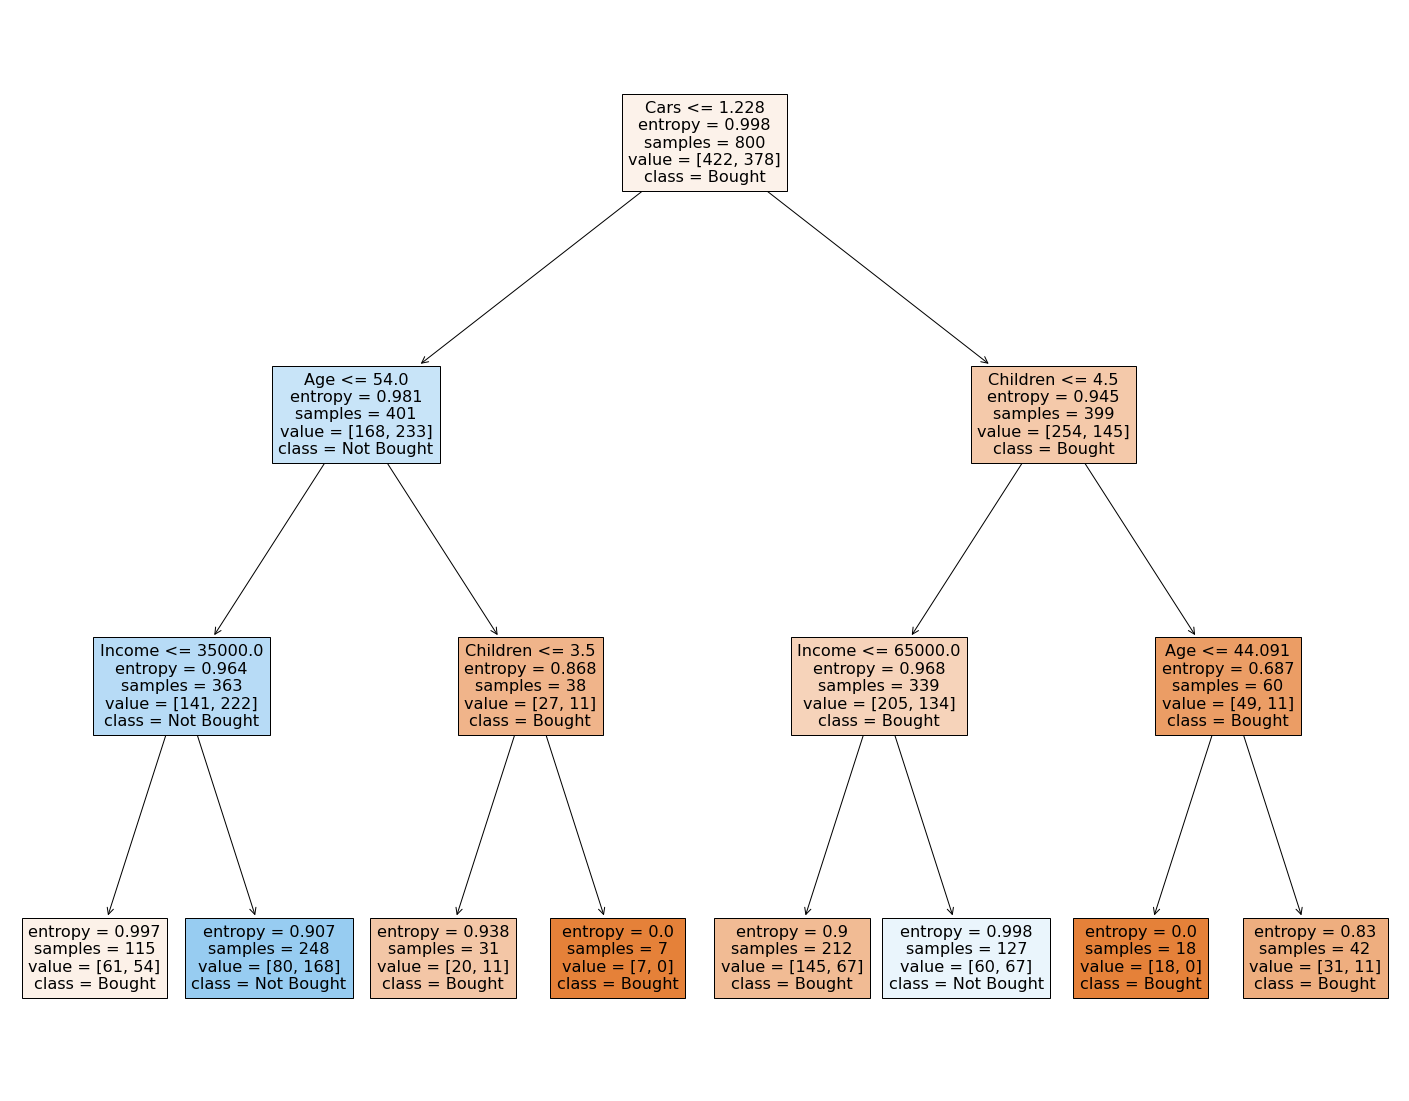

In [ ]:
fn=['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names = fn, 
               class_names=cn, filled=True)

In [ ]:
Y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [ ]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    102
1     98
dtype: int64

In [ ]:
Y_test.value_counts()

1    103
0     97
Name: Purchased Bike, dtype: int64

In [ ]:
preds

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0])

In [ ]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Purchased Bike,,
0,56,41
1,46,57


In [ ]:
# Accuracy 
np.mean(preds==Y_test)

0.565

In [ ]:
Y_test[:]

37     0
726    0
846    0
295    1
924    1
      ..
839    1
810    1
930    0
616    0
809    0
Name: Purchased Bike, Length: 200, dtype: int64

Building Decision Tree Classifier (CART) using Gini Criteria




In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.565

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train) 
result = model.score(X_test, Y_test)

print('Model accuracy score: {0:0.4f}'. format(result))

Model accuracy score: 0.7250


XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
seed = 24
test_size = 0.1
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=seed)

In [ ]:
model = XGBClassifier(n_estimators=45,max_depth=3)
model.fit(X_train, Y_train)

XGBClassifier(n_estimators=45)

In [ ]:
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print('Model Accuracy Score: %.2f%%' % (accuracy*100.0))

Model Accuracy Score: 75.00%


In [ ]:
Y_preds = model.predict(X_train)
predictions = [round(value) for value in Y_preds]

In [ ]:
accuracy = accuracy_score(Y_train, predictions)
print('Model Accuracy Score: %.2f%%' % (accuracy*100.0))

Model Accuracy Score: 75.22%
